# DS 5220 Project
# Haoran Li
# 001519333

# Part 1: Data preprocessing

In [ ]:
# Import packages.
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from statistics import mean

In [ ]:
# Upload the file
uploaded = files.upload()

Saving parkinsons.data to parkinsons.data


In [ ]:
# Load data
df = pd.read_csv("parkinsons.data",index_col=None)
# Remove irrelevant column
df = df.drop(['name'], axis=1)
# Review the dataframe
df

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
# Split the data into training set and test set
np.random.seed(110)
X_df = df.drop('status', axis=1)
y_df = df['status']
Xtrain, Xtest, ytrain, ytest = train_test_split(X_df, y_df, test_size=0.2)

# Scale the data
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain_scaled = scaler.transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

# Part 2: Data visualization

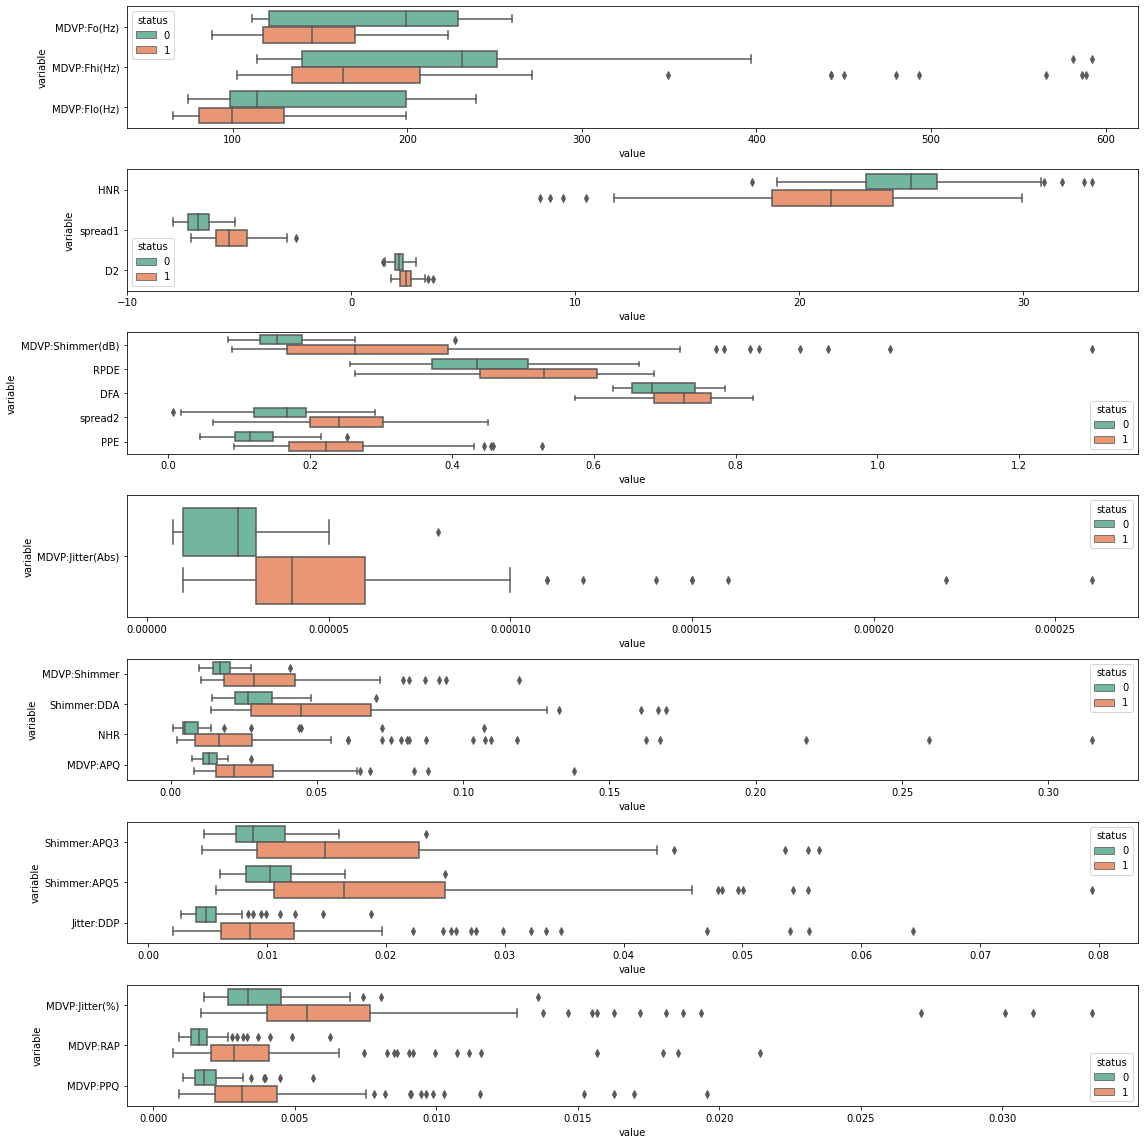

In [ ]:
# Plot the boxplot
fig, axes = plt.subplots(7, 1, figsize=(16,16))
df_long = df[['MDVP:Fo(Hz)','MDVP:Fhi(Hz)','MDVP:Flo(Hz)','status']].melt(id_vars=['status'])
sns.boxplot(data=df_long, x="value", y="variable", orient="h", palette="Set2", hue="status", ax=axes[0])

df_long = df[['HNR','spread1','D2','status']].melt(id_vars=['status'])
sns.boxplot(data=df_long, x="value", y="variable", orient="h", palette="Set2", hue="status", ax=axes[1])

df_long = df[['MDVP:Shimmer(dB)','RPDE','DFA','spread2','PPE','status']].melt(id_vars=['status'])
sns.boxplot(data=df_long, x="value", y="variable", orient="h", palette="Set2", hue="status", ax=axes[2])

df_long = df[['MDVP:Jitter(Abs)','status']].melt(id_vars=['status'])
sns.boxplot(data=df_long, x="value", y="variable", orient="h", palette="Set2", hue="status", ax=axes[3])

df_long = df[['MDVP:Shimmer','Shimmer:DDA','NHR','MDVP:APQ','status']].melt(id_vars=['status'])
sns.boxplot(data=df_long, x="value", y="variable", orient="h", palette="Set2", hue="status", ax=axes[4])

df_long = df[['Shimmer:APQ3','Shimmer:APQ5','Jitter:DDP','status']].melt(id_vars=['status'])
sns.boxplot(data=df_long, x="value", y="variable", orient="h", palette="Set2", hue="status", ax=axes[5])

df_long = df[['MDVP:Jitter(%)','MDVP:RAP','MDVP:PPQ','status']].melt(id_vars=['status'])
sns.boxplot(data=df_long, x="value", y="variable", orient="h", palette="Set2", hue="status", ax=axes[6])

plt.tight_layout()
plt.show()

Discussion: from the results, we can observe that for ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', and 'HNR'], those who have PD have lower mean values in these columns. On the other hand, for other variables except these four, those who have PD have higher mean values.

# Part 3.1: ML model: Linear model

In [ ]:
# Tuning the parameters for our model with cross-validation
logr = LogisticRegression()
logr_cv = {'penalty': ['l1','l2'],  
           'C': [0.001,0.01,0.1,1,10,100],
					 'solver': ['liblinear']}
logr_gs = GridSearchCV(logr, logr_cv, cv=3)
logr_gs.fit(Xtrain, ytrain)
print('Best accuracy: %.3f' % logr_gs.best_score_)
print('\nBest params:', logr_gs.best_params_)

Best accuracy: 0.853

Best params: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


Test score of Linear model is 0.8461538461538461
Test error of Linear model is 0.15384615384615385

Classification report of Linear model:

              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.90      0.90      0.90        29

    accuracy                           0.85        39
   macro avg       0.80      0.80      0.80        39
weighted avg       0.85      0.85      0.85        39


Confusion matrix of Linear model:



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

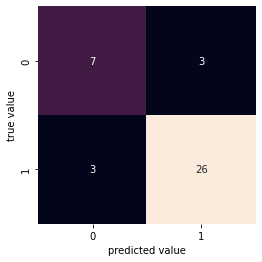

In [ ]:
# Generate the best model and evaluate the error on the test set
logr_best = LogisticRegression(penalty = 'l1',
                               C = 100,
                               solver = 'liblinear')
logr_best.fit(Xtrain, ytrain)
logr_ypred = logr_best.predict(Xtest)

score = logr_best.score(Xtest, ytest)
print("Test score of Linear model is {}".format(score))
print("Test error of Linear model is {}".format(1-score))

print("\nClassification report of Linear model:\n")
print(classification_report(ytest, logr_ypred))

print("\nConfusion matrix of Linear model:\n")
mat = confusion_matrix(ytest, logr_ypred)
mat_labels = np.unique(df['status'])
ax=sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
ax.xaxis.set_ticklabels(mat_labels)
ax.yaxis.set_ticklabels(mat_labels)

Confusion matrix of Linear model with scaled data:



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

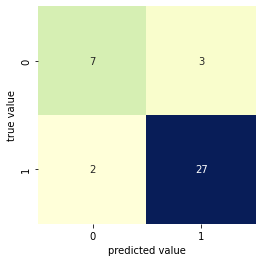

In [ ]:
# Apply our model with scaled data
# Generate the best model and evaluate the error on the test set
logr_best = LogisticRegression(penalty = 'l1',
                               C = 100,
                               solver = 'liblinear')
logr_best.fit(Xtrain_scaled, ytrain)
logr_ypred = logr_best.predict(Xtest_scaled)

print("Confusion matrix of Linear model with scaled data:\n")
mat = confusion_matrix(ytest, logr_ypred)
mat_labels = np.unique(df['status'])
ax=sns.heatmap(mat, square=True, annot=True, cbar=False, cmap="YlGnBu")
plt.xlabel('predicted value')
plt.ylabel('true value')
ax.xaxis.set_ticklabels(mat_labels)
ax.yaxis.set_ticklabels(mat_labels)

Discussion: We have a 0.85 accuracy for the linear model. As we can see from the confusion matrix, our linear model has 0.9 precision to identify PD, which is a relatively good model.

# Part 3.2: ML model: Decision tree

In [ ]:
# Tuning the parameters for our model with cross-validation
dtr = DecisionTreeClassifier()
dtr_cv = {'max_depth': [1,2,3,4,5,6,7,8,9],  
           'min_samples_split': range(2, 10),
					 'min_samples_leaf': range(1, 10)}
dtr_gs = GridSearchCV(dtr, dtr_cv, cv=3, n_jobs=-1)
dtr_gs.fit(Xtrain, ytrain)
print('Best accuracy: %.3f' % dtr_gs.best_score_)
print('\nBest params:\n', dtr_gs.best_params_)

Best accuracy: 0.865

Best params:
 {'max_depth': 2, 'min_samples_leaf': 9, 'min_samples_split': 3}


Test score of Decision tree is 0.9230769230769231
Test error of Decision tree is 0.07692307692307687

Classification report of Decision tree:

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39


Confusion matrix of Decision tree:



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

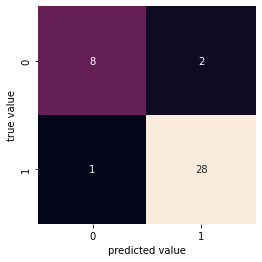

In [ ]:
# Generate the best model and evaluate the error on the test set
dtr_best = DecisionTreeClassifier(max_depth = 2,
                               min_samples_split = 3,
                               min_samples_leaf = 9)
dtr_best.fit(Xtrain, ytrain)
dtr_ypred = dtr_best.predict(Xtest)

score = dtr_best.score(Xtest, ytest)
print("Test score of Decision tree is {}".format(score))
print("Test error of Decision tree is {}".format(1-score))

print("\nClassification report of Decision tree:\n")
print(classification_report(ytest, dtr_ypred))

print("\nConfusion matrix of Decision tree:\n")
mat = confusion_matrix(ytest, dtr_ypred)
mat_labels = np.unique(df['status'])
ax=sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
ax.xaxis.set_ticklabels(mat_labels)
ax.yaxis.set_ticklabels(mat_labels)

Confusion matrix of Decision tree with scaled data:



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

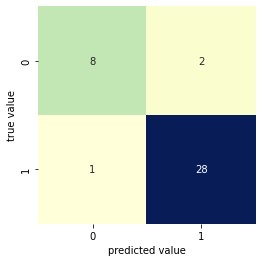

In [ ]:
# Apply our model with scaled data
# Generate the best model and evaluate the error on the test set
dtr_best = DecisionTreeClassifier(max_depth = 2,
                               min_samples_split = 3,
                               min_samples_leaf = 9)
dtr_best.fit(Xtrain_scaled, ytrain)
dtr_ypred = dtr_best.predict(Xtest_scaled)

print("Confusion matrix of Decision tree with scaled data:\n")
mat = confusion_matrix(ytest, dtr_ypred)
mat_labels = np.unique(df['status'])
ax=sns.heatmap(mat, square=True, annot=True, cbar=False, cmap="YlGnBu")
plt.xlabel('predicted value')
plt.ylabel('true value')
ax.xaxis.set_ticklabels(mat_labels)
ax.yaxis.set_ticklabels(mat_labels)

Discussion: As we can see from the confusion matrix, our decision tree model has 0.93 precision, 0.97 recall and 0.92 accuracy. Apparently, compared to the linear model, the decision tree performs better.


# Part 3.3: ML model: LDA model

In [ ]:
# Tuning the parameters for our model with cross-validation
lda = LinearDiscriminantAnalysis()
lda_cv = {'solver': ['svd', 'lsqr', 'eigen']}
lda_gs = GridSearchCV(lda, lda_cv, cv=3, n_jobs=-1)
lda_gs.fit(Xtrain, ytrain)
print('Best accuracy: %.3f' % lda_gs.best_score_)
print('\nBest params:\n', lda_gs.best_params_)

Best accuracy: 0.846

Best params:
 {'solver': 'svd'}


Test score of LDA is 0.9230769230769231
Test error of LDA is 0.07692307692307687

Classification report of LDA:

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39


Confusion matrix of LDA:



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

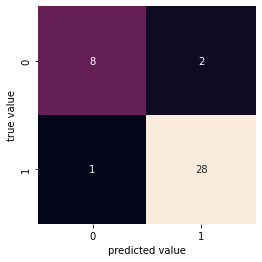

In [ ]:
# Generate the best model and evaluate the error on the test set
lda_best = LinearDiscriminantAnalysis(solver = 'svd')
lda_best.fit(Xtrain, ytrain)
lda_ypred = lda_best.predict(Xtest)

score = lda_best.score(Xtest, ytest)
print("Test score of LDA is {}".format(score))
print("Test error of LDA is {}".format(1-score))

print("\nClassification report of LDA:\n")
print(classification_report(ytest, lda_ypred))

print("\nConfusion matrix of LDA:\n")
mat = confusion_matrix(ytest, lda_ypred)
mat_labels = np.unique(df['status'])
ax=sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
ax.xaxis.set_ticklabels(mat_labels)
ax.yaxis.set_ticklabels(mat_labels)

Confusion matrix of LDA with scaled data:



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

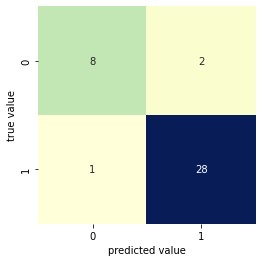

In [ ]:
# Apply our model with scaled data
# Generate the best model and evaluate the error on the test set
lda_best = LinearDiscriminantAnalysis(solver = 'svd')
lda_best.fit(Xtrain_scaled, ytrain)
lda_ypred = lda_best.predict(Xtest_scaled)

print("Confusion matrix of LDA with scaled data:\n")
mat = confusion_matrix(ytest, lda_ypred)
mat_labels = np.unique(df['status'])
ax=sns.heatmap(mat, square=True, annot=True, cbar=False, cmap="YlGnBu")
plt.xlabel('predicted value')
plt.ylabel('true value')
ax.xaxis.set_ticklabels(mat_labels)
ax.yaxis.set_ticklabels(mat_labels)

Discussion: the results show that LDA performs similarly to the decision tree.


# Part 3.4: ML model: QDA model

Test score of QDA is 0.9230769230769231
Test error of QDA is 0.07692307692307687

Classification report of QDA:

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.91      1.00      0.95        29

    accuracy                           0.92        39
   macro avg       0.95      0.85      0.89        39
weighted avg       0.93      0.92      0.92        39


Confusion matrix of QDA:



/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

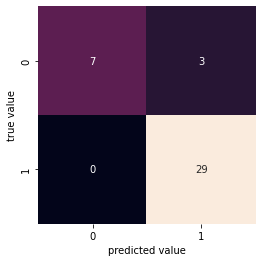

In [ ]:
# Generate the best model and evaluate the error on the test set
qda_best = QuadraticDiscriminantAnalysis()
qda_best.fit(Xtrain, ytrain)
qda_ypred = qda_best.predict(Xtest)

score = qda_best.score(Xtest, ytest)
print("Test score of QDA is {}".format(score))
print("Test error of QDA is {}".format(1-score))

print("\nClassification report of QDA:\n")
print(classification_report(ytest, qda_ypred))

print("\nConfusion matrix of QDA:\n")
mat = confusion_matrix(ytest, qda_ypred)
mat_labels = np.unique(df['status'])
ax=sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
ax.xaxis.set_ticklabels(mat_labels)
ax.yaxis.set_ticklabels(mat_labels)

Confusion matrix of QDA with scaled data:



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

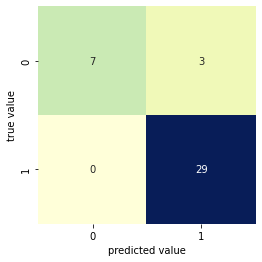

In [ ]:
# Apply our model with scaled data
# Generate the best model and evaluate the error on the test set
qda_best = QuadraticDiscriminantAnalysis()
qda_best.fit(Xtrain_scaled, ytrain)
qda_ypred = qda_best.predict(Xtest_scaled)

print("Confusion matrix of QDA with scaled data:\n")
mat = confusion_matrix(ytest, qda_ypred)
mat_labels = np.unique(df['status'])
ax=sns.heatmap(mat, square=True, annot=True, cbar=False, cmap="YlGnBu")
plt.xlabel('predicted value')
plt.ylabel('true value')
ax.xaxis.set_ticklabels(mat_labels)
ax.yaxis.set_ticklabels(mat_labels)

Discussion: Comparing to the LDA and decision tree, QDA has a higher recall: 1 and a lower precision: 0.91. They all have a 0.92 accuracy.


# Part 3.5: ML model: KNN model

In [ ]:
# Tuning the parameters for our model with cross-validation
knn = KNeighborsClassifier()
knn_cv = {"n_neighbors": np.arange(1, 25)}
knn_gs = GridSearchCV(knn, knn_cv, cv=3, n_jobs=-1)
knn_gs.fit(Xtrain, ytrain)
print('Best accuracy: %.3f' % knn_gs.best_score_)
print('\nBest params:\n', knn_gs.best_params_)

Best accuracy: 0.859

Best params:
 {'n_neighbors': 3}


Test score of KNN is 0.8461538461538461
Test error of KNN is 0.15384615384615385

Classification report of KNN:

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.87      0.93      0.90        29

    accuracy                           0.85        39
   macro avg       0.81      0.77      0.78        39
weighted avg       0.84      0.85      0.84        39


Confusion matrix of KNN:



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

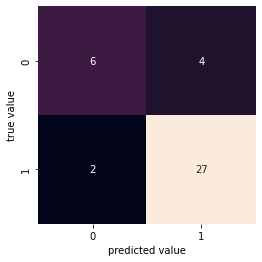

In [ ]:
# Generate the best model and evaluate the error on the test set
knn_best = KNeighborsClassifier(n_neighbors = 3)
knn_best.fit(Xtrain, ytrain)
knn_ypred = knn_best.predict(Xtest)

score = knn_best.score(Xtest, ytest)
print("Test score of KNN is {}".format(score))
print("Test error of KNN is {}".format(1-score))

print("\nClassification report of KNN:\n")
print(classification_report(ytest, knn_ypred))

print("\nConfusion matrix of KNN:\n")
mat = confusion_matrix(ytest, knn_ypred)
mat_labels = np.unique(df['status'])
ax=sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
ax.xaxis.set_ticklabels(mat_labels)
ax.yaxis.set_ticklabels(mat_labels)

Test score of KNN is 1.0
Test error of KNN is 0.0

Classification report of KNN:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        29

    accuracy                           1.00        39
   macro avg       1.00      1.00      1.00        39
weighted avg       1.00      1.00      1.00        39

Confusion matrix of KNN with scaled data:



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

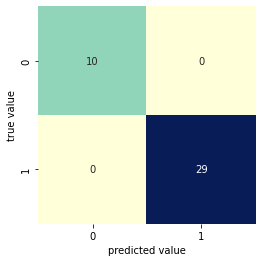

In [ ]:
# Apply our model with scaled data
# Generate the best model and evaluate the error on the test set
knn_best = KNeighborsClassifier(n_neighbors = 3)
knn_best.fit(Xtrain_scaled, ytrain)
knn_ypred = knn_best.predict(Xtest_scaled)

score = knn_best.score(Xtest_scaled, ytest)
print("Test score of KNN is {}".format(score))
print("Test error of KNN is {}".format(1-score))

print("\nClassification report of KNN:\n")
print(classification_report(ytest, knn_ypred))

print("Confusion matrix of KNN with scaled data:\n")
mat = confusion_matrix(ytest, knn_ypred)
mat_labels = np.unique(df['status'])
ax=sns.heatmap(mat, square=True, annot=True, cbar=False, cmap="YlGnBu")
plt.xlabel('predicted value')
plt.ylabel('true value')
ax.xaxis.set_ticklabels(mat_labels)
ax.yaxis.set_ticklabels(mat_labels)

Discussion: the results show that KNN performs worse on original data. However, if we scale the data, KNN performs accurately.


# Part 3.6: ML model: Random forest

In [ ]:
# Tuning the parameters for our model with cross-validation
rf = RandomForestClassifier()
rf_cv = {'n_estimators': [50,100,150,200,500],
         'max_depth': [1,2,3,4,5,6,7,8,9],
         'min_samples_split': range(2, 10),
         'min_samples_leaf': range(1, 10)}
rf_gs = GridSearchCV(rf, rf_cv, cv=3)
rf_gs.fit(Xtrain, ytrain)
print('Best accuracy: %.3f' % rf_gs.best_score_)
print('\nBest params:\n', rf_gs.best_params_)

Best accuracy: 0.904

Best params:
 {'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 50}


Test score of Random forest is 0.9743589743589743
Test error of Random forest is 0.02564102564102566

Classification report of Random forest:

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        10
           1       0.97      1.00      0.98        29

    accuracy                           0.97        39
   macro avg       0.98      0.95      0.97        39
weighted avg       0.98      0.97      0.97        39


Confusion matrix of Random forest:



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

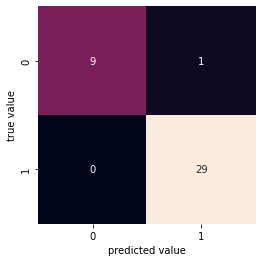

In [ ]:
# Generate the best model and evaluate the error on the test set
rf_best = RandomForestClassifier(max_depth = 5,
                                 min_samples_leaf = 3,
                                 min_samples_split = 3,
                                 n_estimators = 50)
rf_best.fit(Xtrain, ytrain)
rf_ypred = rf_best.predict(Xtest)

score = rf_best.score(Xtest, ytest)
print("Test score of Random forest is {}".format(score))
print("Test error of Random forest is {}".format(1-score))

print("\nClassification report of Random forest:\n")
print(classification_report(ytest, rf_ypred))

print("\nConfusion matrix of Random forest:\n")
mat = confusion_matrix(ytest, rf_ypred)
mat_labels = np.unique(df['status'])
ax=sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')
ax.xaxis.set_ticklabels(mat_labels)
ax.yaxis.set_ticklabels(mat_labels)

Confusion matrix of Random forest with scaled data:



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

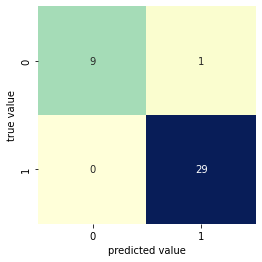

In [ ]:
# Apply our model with scaled data
# Generate the best model and evaluate the error on the test set
rf_best = RandomForestClassifier(max_depth = 5,
                                 min_samples_leaf = 3,
                                 min_samples_split = 3,
                                 n_estimators = 50)
rf_best.fit(Xtrain_scaled, ytrain)
rf_ypred = rf_best.predict(Xtest_scaled)

print("Confusion matrix of Random forest with scaled data:\n")
mat = confusion_matrix(ytest, rf_ypred)
mat_labels = np.unique(df['status'])
ax=sns.heatmap(mat, square=True, annot=True, cbar=False, cmap="YlGnBu")
plt.xlabel('predicted value')
plt.ylabel('true value')
ax.xaxis.set_ticklabels(mat_labels)
ax.yaxis.set_ticklabels(mat_labels)


Feature importances of Random forest:



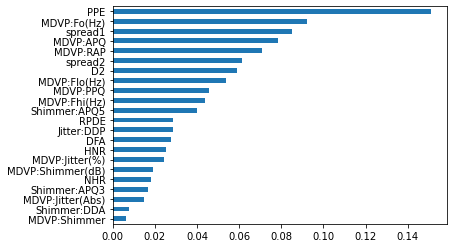

In [ ]:
# Plot the importances among all features
print("\nFeature importances of Random forest:\n")
rf_feature_importances = rf_best.feature_importances_
feature_name = Xtrain.columns
sorted_graph = pd.Series(rf_feature_importances, feature_name)
sorted_graph.sort_values().plot.barh()

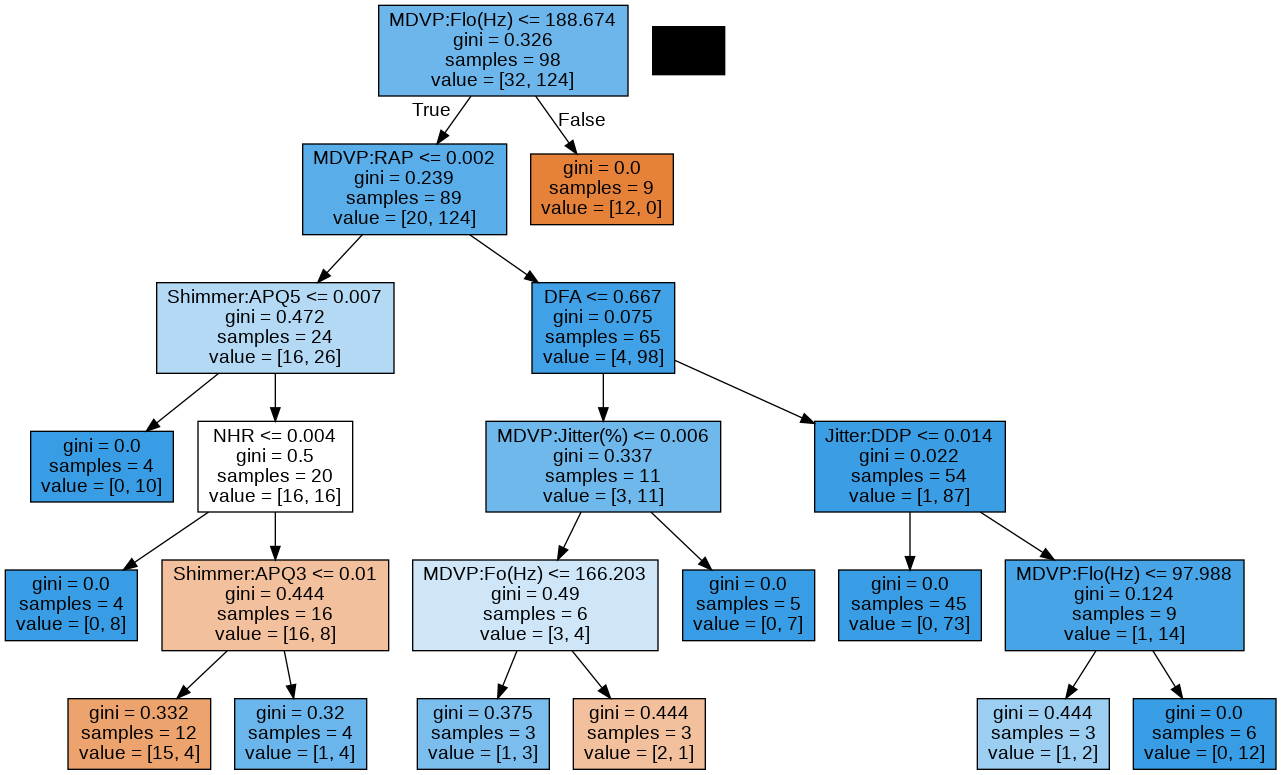

In [ ]:
# Plot the one of the tress
sub_tree = rf_best.estimators_[22]
dot_data = export_graphviz(sub_tree,feature_names=Xtrain.columns,filled=True)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

Discussion: the random forest model has the best performance among the models we have generated. Its test accuracy is 0.97, along with 0.97 precision and 1 recall. Among all the test samples, it only incorrectly predicts one healthy sample as a PD sample. As shown in the bar plot, 'PPE', 'MDVP:Fo(Hz)', 'spread1' play significant roles in our random forest model.

# Part 3.7: ML model: Ridge regression

In [ ]:
# Find the optimal value of alpha
ridge_cv = RidgeClassifierCV(cv=10)
ridge_cv.fit(Xtrain_scaled, ytrain)
print("Optimal λ = {}".format(ridge_cv.alpha_))

Optimal λ = 0.1


Test score of Ridge regression is 0.9487179487179487
Test error of Ridge regression is 0.05128205128205132

Classification report of Ridge regression:

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.94      1.00      0.97        29

    accuracy                           0.95        39
   macro avg       0.97      0.90      0.93        39
weighted avg       0.95      0.95      0.95        39


Confusion matrix of Ridge regression with scaled data:



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

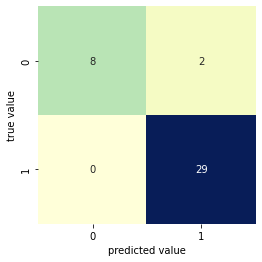

In [ ]:
# Generate the best model and evaluate the error on the test set
ridge_best = RidgeClassifier(alpha = 0.1)
ridge_best.fit(Xtrain_scaled, ytrain)
ridge_ypred = ridge_best.predict(Xtest_scaled)

score = ridge_best.score(Xtest_scaled, ytest)
print("Test score of Ridge regression is {}".format(score))
print("Test error of Ridge regression is {}".format(1-score))

print("\nClassification report of Ridge regression:\n")
print(classification_report(ytest, ridge_ypred))

print("\nConfusion matrix of Ridge regression with scaled data:\n")
mat = confusion_matrix(ytest, ridge_ypred)
mat_labels = np.unique(df['status'])
ax=sns.heatmap(mat, square=True, annot=True, cbar=False, cmap="YlGnBu")
plt.xlabel('predicted value')
plt.ylabel('true value')
ax.xaxis.set_ticklabels(mat_labels)
ax.yaxis.set_ticklabels(mat_labels)

Discussion: ridge regression has a 0.95 accuracy score, along with 0.94 precision score and 1 recall score.

# Part 3.8: ML model: Neural network

In [ ]:
# Ser the environment for nn
!pip install torch torchvision tqdm
import torch
import torch.nn as nn

In [ ]:
# Redefine the data
X_train = torch.FloatTensor(Xtrain_scaled)
X_test = torch.FloatTensor(Xtest_scaled)
y_train = torch.FloatTensor(ytrain.values)
y_test = torch.FloatTensor(ytest.values)

y_train=y_train.view(y_train.shape[0],1)
y_test=y_test.view(y_test.shape[0],1)

# Check for the shape of our data
n_samples,n_features=X_train.shape
print(n_samples)
print(n_features)

156
22


In [ ]:
# Define the neural network
class PDClassifier(torch.nn.Module):
 def __init__(self,no_input_features):
   super(PDClassifier,self).__init__()
   self.fc1 = nn.Sequential(
       nn.Linear(no_input_features, 300),
       nn.ReLU()
       )
   self.fc2 = nn.Sequential(
       nn.Linear(300, 100),
       nn.ReLU()
       )
   self.fc3 = nn.Linear(100, 1)
 def forward(self,x):
   x = self.fc1(x)
   x = self.fc2(x)
   y_predicted = torch.sigmoid(self.fc3(x))
   return y_predicted

model = PDClassifier(n_features)
# Sanity check
print(model)

PDClassifier(
  (fc1): Sequential(
    (0): Linear(in_features=22, out_features=300, bias=True)
    (1): ReLU()
  )
  (fc2): Sequential(
    (0): Linear(in_features=300, out_features=100, bias=True)
    (1): ReLU()
  )
  (fc3): Linear(in_features=100, out_features=1, bias=True)
)


In [ ]:
# Evaluate the loss
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

number_of_epochs = 150
for epoch in range(number_of_epochs):
 y_prediction = model(X_train)
 loss = criterion(y_prediction,y_train)
 loss.backward()
 optimizer.step()
 optimizer.zero_grad()
 if (epoch+1)%10 == 0:
   print('epoch:', epoch+1,',loss=',loss.item())

epoch: 10 ,loss= 0.17978022992610931
epoch: 20 ,loss= 0.1788160800933838
epoch: 30 ,loss= 0.17785634100437164
epoch: 40 ,loss= 0.1769036501646042
epoch: 50 ,loss= 0.1759537011384964
epoch: 60 ,loss= 0.17500567436218262
epoch: 70 ,loss= 0.17406168580055237
epoch: 80 ,loss= 0.1731199473142624
epoch: 90 ,loss= 0.17218109965324402
epoch: 100 ,loss= 0.17124472558498383
epoch: 110 ,loss= 0.17030936479568481
epoch: 120 ,loss= 0.16937744617462158
epoch: 130 ,loss= 0.16845308244228363
epoch: 140 ,loss= 0.16753225028514862
epoch: 150 ,loss= 0.16661708056926727


Test score of Neural network is 0.8717948794364929
Test error of Neural network is 0.12820512056350708

Classification report of Neural network:

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74        10
         1.0       0.90      0.93      0.92        29

    accuracy                           0.87        39
   macro avg       0.84      0.82      0.83        39
weighted avg       0.87      0.87      0.87        39


Confusion matrix of Neural network with scaled data:



[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

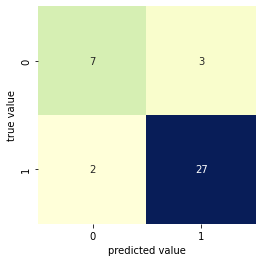

In [ ]:
# Generate the best model and evaluate the error on the test set
with torch.no_grad():
 y_pred = model(X_test)
 y_pred_class = y_pred.round()
 accuracy = (y_pred_class.eq(y_test).sum())/float(y_test.shape[0])

score = accuracy.item()
print("Test score of Neural network is {}".format(score))
print("Test error of Neural network is {}".format(1-score))

print("\nClassification report of Neural network:\n")
print(classification_report(y_test, y_pred_class))

print("\nConfusion matrix of Neural network with scaled data:\n")
mat = confusion_matrix(y_test, y_pred_class)
mat_labels = np.unique(df['status'])
ax=sns.heatmap(mat, square=True, annot=True, cbar=False, cmap="YlGnBu")
plt.xlabel('predicted value')
plt.ylabel('true value')
ax.xaxis.set_ticklabels(mat_labels)
ax.yaxis.set_ticklabels(mat_labels)

Discussion: neural net model has a 0.87 accuracy, which is lower compared with other models.

# Part 4: Conclusion

In this project, the primary goal is to provide the best performance model of detecting Parkinson's disease in an individual by implementing different machine learning methods. In the visualization part, we have discovered several features that are different from others, which consist of 'MDVP: Fo(Hz),' 'MDVP: Fhi(Hz),' 'MDVP: Flo(Hz),' and 'HNR.' We have also scaled our original data to make a comparison between different attempts.

The best model we got is the KNN model with scaled data. This model is perfectly accurate, which has a 1.0 accuracy. This model has exceeded our expectations. However, considering KNN has a disadvantage when performing on high dimensions datasets and is sensitive to outliers, we have been encouraged to study more after this project to determine if KNN is desirable in this specific topic.

Taking the sample numbers into consideration, we believe another optimal model is the random forest model. It has a 0.97 accuracy and only incorrectly predicts one healthy sample as a PD sample. Random forest can be less impacted by noise and robust to outliers. It also handles well when the sample set is small. From this model, we have also observed the top 3 important features, which are 'PPE', 'MDVP:Fo(Hz)', and 'spread1'.

Other attampts include logistic regression, decision tree, LDA, QDA, ridge regression, and neural network. Among these models, QDA and ridge regression perform well when detecting the healthy people, but have worse performance when detecting those who have Parkinson's disease. Decision tree and LDA both have 0.93 precision score and 0.97 recall score. Neural net performs better than the logistic regression model, but they both have accuracy that lower than 0.9.

Hence, based on what we have discovered, we present our random forest model as the best model to detect Parkinson's disease. Despite of the performance, random forest has reduced possible negetive effects, such as the small size of our dataset. From the perspective of data science, we recommend that 'PPE', 'MDVP:Fo(Hz)', and 'spread1' worth more attention when detecting Parkinson's disease.